<a href="https://colab.research.google.com/github/Omarhadi79/Codingpractice/blob/main/work_through_nn_solution_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

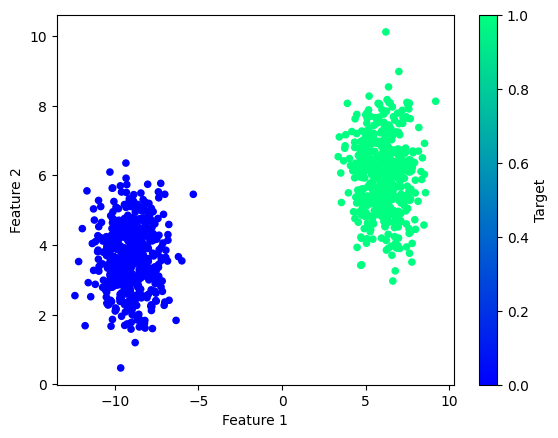

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")
plt.show()

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 5ms/step - loss: 0.6489 - accuracy: 0.7827
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.8427
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.9013
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.9373
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.9587
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.9733
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.9800
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.9853
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.9880
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.9880
Epoch 11/

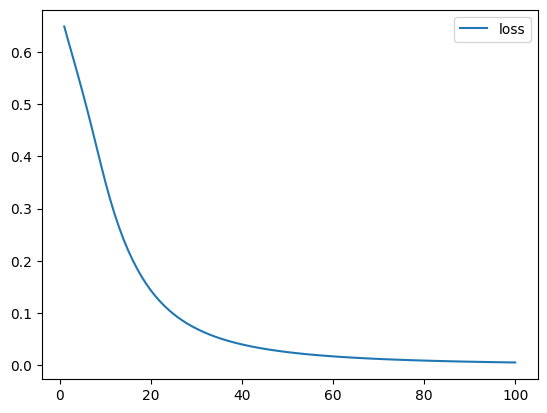

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

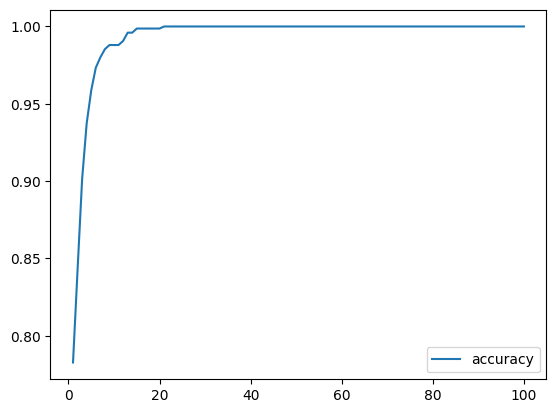

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0038 - accuracy: 1.0000 - 409ms/epoch - 51ms/step
Loss: 0.0037568549159914255, Accuracy: 1.0
